In [5]:
import os
import pandas as pd
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from matplotlib import style
import matplotlib.pyplot as plt
from sklearn import datasets
from jupyterthemes import jtplot
import json

from datetime import datetime

In [6]:
stock_name = "resources/stocks_list.csv"
stockname_df = pd.read_csv(stock_name)
stockname_df.head(10)

,Symbol,Name,Industry,Market Cap
0,A,Agilent Technologies,Life Sciences Tools & Services,4.154164e+10
1,AA,Alcoa,Metals & Mining,1.661080e+10
2,AAC,Ares Acquisition,Blank Check / SPAC,1.467000e+09
3,AACG,ATA Creativity Global,Diversified Consumer Services,4.298635e+07
4,AACI,Armada Acquisition I,Blank Check / SPAC,2.039886e+08
5,AADI,Aadi Bioscience,Biotechnology,3.725486e+08
6,AAIC,Arlington Asset Investment,Mortgage Real Estate Investment Trust...,1.075756e+08
7,AAL,American Airlines Group,Airlines,1.178875e+10
8,AAMC,Altisource Asset Management,Real Estate Management & Development,3.095673e+07
9,AAME,Atlantic American,Insurance,6.052444e+07


In [ ]:
stockname_df.to_html("stockname.html",index = False, classes = ["table", "table-hover", "table-striped"])

In [4]:
# Extract the data set from csv file: 
stock = "resources/all_stocks_5yr.csv"
allstock_df = pd.read_csv(stock)
#rename column for merge
allstock_df=allstock_df.rename(columns={"Name":"Symbol"})
allstock_df.head(10)

,date,open,high,low,close,volume,Symbol
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL
6,2013-02-19,14.33,14.56,14.08,14.26,11354400,AAL
7,2013-02-20,14.17,14.26,13.15,13.33,14725200,AAL
8,2013-02-21,13.62,13.95,12.90,13.37,11922100,AAL
9,2013-02-22,13.57,13.60,13.21,13.57,6071400,AAL


In [5]:
#load helper csv to add name and industry to original dataset
stockname="resources/stocks_list.csv"
stockname_df=pd.read_csv(stockname)
stockname_df=stockname_df[['Symbol','Name','Industry']]
stockname_df.head()

,Symbol,Name,Industry
0,A,Agilent Technologies,Life Sciences Tools & Services
1,AA,Alcoa,Metals & Mining
2,AAC,Ares Acquisition,Blank Check / SPAC
3,AACG,ATA Creativity Global,Diversified Consumer Services
4,AACI,Armada Acquisition I,Blank Check / SPAC


In [6]:
#merge 2 datasets
merged_df=pd.merge(allstock_df ,stockname_df, how='left', on='Symbol')
merged_df.head()

,date,open,high,low,close,volume,Symbol,Name,Industry
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,American Airlines Group,Airlines
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,American Airlines Group,Airlines
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,American Airlines Group,Airlines
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,American Airlines Group,Airlines
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,American Airlines Group,Airlines


In [7]:
# narrow down into 1 year (2018) 

one_year_df = merged_df.loc[merged_df["date"] >= "2017-01-01"]
one_year_df

,date,open,high,low,close,volume,Symbol,Name,Industry
982,2017-01-03,47.28,47.340,46.135,46.30,6737752,AAL,American Airlines Group,Airlines
983,2017-01-04,46.63,47.435,46.350,46.70,5859604,AAL,American Airlines Group,Airlines
984,2017-01-05,46.52,46.930,45.610,45.89,6825316,AAL,American Airlines Group,Airlines
985,2017-01-06,45.85,46.720,45.470,46.21,7260197,AAL,American Airlines Group,Airlines
986,2017-01-09,46.01,47.340,45.780,47.08,4739142,AAL,American Airlines Group,Airlines
...,...,...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.270,76.690,77.82,2982259,ZTS,Zoetis,Pharmaceuticals
619036,2018-02-02,77.53,78.120,76.730,76.78,2595187,ZTS,Zoetis,Pharmaceuticals
619037,2018-02-05,76.64,76.920,73.180,73.83,2962031,ZTS,Zoetis,Pharmaceuticals
619038,2018-02-06,72.74,74.560,72.130,73.27,4924323,ZTS,Zoetis,Pharmaceuticals


In [8]:
one_year_df = one_year_df.reset_index(drop=True)
one_year_df

,date,open,high,low,close,volume,Symbol,Name,Industry
0,2017-01-03,47.28,47.340,46.135,46.30,6737752,AAL,American Airlines Group,Airlines
1,2017-01-04,46.63,47.435,46.350,46.70,5859604,AAL,American Airlines Group,Airlines
2,2017-01-05,46.52,46.930,45.610,45.89,6825316,AAL,American Airlines Group,Airlines
3,2017-01-06,45.85,46.720,45.470,46.21,7260197,AAL,American Airlines Group,Airlines
4,2017-01-09,46.01,47.340,45.780,47.08,4739142,AAL,American Airlines Group,Airlines
...,...,...,...,...,...,...,...,...,...
139157,2018-02-01,76.84,78.270,76.690,77.82,2982259,ZTS,Zoetis,Pharmaceuticals
139158,2018-02-02,77.53,78.120,76.730,76.78,2595187,ZTS,Zoetis,Pharmaceuticals
139159,2018-02-05,76.64,76.920,73.180,73.83,2962031,ZTS,Zoetis,Pharmaceuticals
139160,2018-02-06,72.74,74.560,72.130,73.27,4924323,ZTS,Zoetis,Pharmaceuticals


In [9]:
quantity = one_year_df["Name"].unique()
quantity

array(['American Airlines Group', 'Apple', 'Advance Auto Parts', 'AbbVie',
       'AmerisourceBergen', 'Abbott Laboratories', 'Accenture', 'Adobe',
       'Analog Devices', 'Archer-Daniels-Midland Company',
       'Automatic Data Processing', 'Autodesk', 'Alliance Data Systems',
       'Ameren', 'American Electric Power Company', 'The AES Corporation',
       nan, 'Aflac', 'American International Group',
       'Apartment Investment & Management Company', 'Assurant',
       'Arthur J. Gallagher & Company', 'Akamai Technologies',
       'Albemarle', 'Align Technology', 'Alaska Air Group', 'Allegion',
       'The Allstate Corporation', 'Applied Materials',
       'Advanced Micro Devices', 'AMETEK', 'Amgen',
       'Affiliated Managers Group', 'Ameriprise Financial',
       'American Tower', 'Amazon.com', 'ANSYS', 'Anthem', 'Aon plc',
       'A. O. Smith', 'APA Corporation', 'Air Products & Chemicals',
       'Amphenol', 'Aptiv', 'Alexandria Real Estate Equities', 'Arconic',
       'Activ

In [10]:
#View all Industry in the orignal dataset to select which industry to focus on
one_year_df["Industry"].unique()

array(['Airlines', 'Technology Hardware, Storage & Periph...',
       'Specialty Retail', 'Biotechnology',
       'Health Care Providers & Services',
       'Health Care Equipment & Supplies', 'IT Services', 'Software',
       'Semiconductors & Semiconductor Equipment', 'Food Products',
       'Multi-Utilities', 'Electric Utilities',
       'Independent Power and Renewable Elect...', nan, 'Insurance',
       'Equity Real Estate Investment Trusts ...', 'Chemicals',
       'Building Products', 'Electrical Equipment', 'Capital Markets',
       'Internet & Direct Marketing Retail',
       'Oil, Gas & Consumable Fuels',
       'Electronic Equipment, Instruments & C...', 'Auto Components',
       'Aerospace & Defense', 'Entertainment', 'Containers & Packaging',
       'Water Utilities', 'Consumer Finance',
       'Life Sciences Tools & Services', 'Banks', 'Beverages',
       'Pharmaceuticals', 'Diversified Financial Services', 'Machinery',
       'Hotels, Restaurants & Leisure', 'Health Care

In [11]:
#Dataframe with Pharmaceutical industries into json file
pharm_df=one_year_df.loc[one_year_df["Industry"] == "Pharmaceuticals"]
pharm_df

,date,open,high,low,close,volume,Symbol,Name,Industry
19729,2017-01-03,58.78,59.68,58.58,59.45,10061749,BMY,Bristol-Myers Squibb Company,Pharmaceuticals
19730,2017-01-04,59.46,59.75,59.03,59.14,6703370,BMY,Bristol-Myers Squibb Company,Pharmaceuticals
19731,2017-01-05,59.39,60.42,59.31,60.13,8422274,BMY,Bristol-Myers Squibb Company,Pharmaceuticals
19732,2017-01-06,60.04,60.33,58.85,59.95,10104635,BMY,Bristol-Myers Squibb Company,Pharmaceuticals
19733,2017-01-09,59.75,59.92,59.65,59.73,5263011,BMY,Bristol-Myers Squibb Company,Pharmaceuticals
...,...,...,...,...,...,...,...,...,...
139157,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS,Zoetis,Pharmaceuticals
139158,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS,Zoetis,Pharmaceuticals
139159,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS,Zoetis,Pharmaceuticals
139160,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS,Zoetis,Pharmaceuticals


In [12]:
#Dataframe with "Technology Hardware, Storage & Periph..." industries into json file
tech_df=one_year_df.loc[one_year_df["Industry"] == "Technology Hardware, Storage & Periph..."]
tech_df
#tech_df.to_json(r'jsonfiles/technology.json')

,date,open,high,low,close,volume,Symbol,Name,Industry
277,2017-01-03,115.80,116.3300,114.760,116.15,28781865,AAPL,Apple,"Technology Hardware, Storage & Periph..."
278,2017-01-04,115.85,116.5100,115.750,116.02,21118116,AAPL,Apple,"Technology Hardware, Storage & Periph..."
279,2017-01-05,115.92,116.8642,115.810,116.61,22193587,AAPL,Apple,"Technology Hardware, Storage & Periph..."
280,2017-01-06,116.78,118.1600,116.470,117.91,31751900,AAPL,Apple,"Technology Hardware, Storage & Periph..."
281,2017-01-09,117.95,119.4300,117.940,118.99,33561948,AAPL,Apple,"Technology Hardware, Storage & Periph..."
...,...,...,...,...,...,...,...,...,...
137772,2018-02-01,34.10,34.3300,32.560,32.75,8154921,XRX,Xerox Holdings,"Technology Hardware, Storage & Periph..."
137773,2018-02-02,32.51,32.5100,31.535,31.63,3526028,XRX,Xerox Holdings,"Technology Hardware, Storage & Periph..."
137774,2018-02-05,31.80,32.6800,31.380,31.38,4104575,XRX,Xerox Holdings,"Technology Hardware, Storage & Periph..."
137775,2018-02-06,30.94,31.5300,30.220,30.85,4431244,XRX,Xerox Holdings,"Technology Hardware, Storage & Periph..."


In [13]:
#Dataframe with Banks industries into json file
banks_df=one_year_df.loc[one_year_df["Industry"] == "Banks"]
#banks_df.to_json(r'jsonfiles/finance.json')
banks_df

,date,open,high,low,close,volume,Symbol,Name,Industry
16110,2017-01-03,22.60,22.680,22.200,22.53,99298080,BAC,Bank of America,Banks
16111,2017-01-04,22.72,22.960,22.600,22.95,76875052,BAC,Bank of America,Banks
16112,2017-01-05,22.82,22.930,22.345,22.68,86826447,BAC,Bank of America,Banks
16113,2017-01-06,22.78,22.850,22.560,22.68,66281476,BAC,Bank of America,Banks
16114,2017-01-09,22.51,22.710,22.400,22.55,75901509,BAC,Bank of America,Banks
...,...,...,...,...,...,...,...,...,...
138880,2018-02-01,53.79,55.000,53.590,54.98,3542047,ZION,Zions Bancorporation NA,Banks
138881,2018-02-02,54.77,55.610,53.980,54.15,4533570,ZION,Zions Bancorporation NA,Banks
138882,2018-02-05,53.54,54.160,51.220,51.65,3305284,ZION,Zions Bancorporation NA,Banks
138883,2018-02-06,50.41,52.760,49.761,52.52,3682542,ZION,Zions Bancorporation NA,Banks


In [20]:
BanksQuantity = banks_df["Name"].unique()
BanksQuantity

array(['Bank of America', 'Citizens Financial Group', 'Comerica',
       'Citigroup', 'Fifth Third Bancorp', 'Huntington Bancshares',
       'JPMorgan Chase & Co.', 'KeyCorp', 'M&T Bank',
       "People's United Financial", 'The PNC Financial Services Group',
       'Regions Financial', 'U.S. Bancorp', 'Wells Fargo & Company',
       'Zions Bancorporation NA'], dtype=object)

In [21]:
# extract the close prices our to a list for boxplot to
BAC = banks_df.loc[banks_df["Name"]=="Bank of America","close"]
CFG = banks_df.loc[banks_df["Name"]=="Citizens Financial Group","close"]
COM = banks_df.loc[banks_df["Name"]== "Comerica","close"]
CITI = banks_df.loc[banks_df["Name"]== "Citigroup","close"]
FifThird = banks_df.loc[banks_df["Name"]== "Fifth Third Bancorp","close"]
HBancshares = banks_df.loc[banks_df["Name"]== "Huntington Bancshares","close"]



In [24]:
bankStock_list = ["Bank of America", "Citizens Financial Group", "Comerica", "Citigroup","Fifth Third Bancorp","Huntington Bancshares"]

# Create empty list to fill with stock close prices
bank_price_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for price in bankStock_list:
    
    
    prices = banks_df.loc[banks_df["Name"] == price, 'close']
    
    # add subset 
    bank_price_list.append(prices)
    
    # Determine outliers using upper and lower bounds
    quartiles = prices.quantile([.25,.5,.75])
    print(quartiles)

0.25    23.37
0.50    24.37
0.75    26.59
Name: close, dtype: float64
0.25    35.03
0.50    36.68
0.75    38.05
Name: close, dtype: float64
0.25    69.24
0.50    72.46
0.75    78.42
Name: close, dtype: float64
0.25    60.37
0.50    66.89
0.75    73.12
Name: close, dtype: float64
0.25    25.56
0.50    26.76
0.75    28.42
Name: close, dtype: float64
0.25    13.01
0.50    13.46
0.75    14.11
Name: close, dtype: float64


In [27]:
quartiles = BAC.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of bank stock prices in the year is: {lowerq}")
print(f"The upper quartile of bank stock prices in the year is: {upperq}")
print(f"The interquartile range of bank stock prices in the year is: {iqr}")
print(f"The the median of bank stock prices in the year is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)  # lower the lower (1.5 times the iqr)|upper the upper () -> ouliers 
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of bank stock prices in the year is: 23.37
The upper quartile of bank stock prices in the year is: 26.59
The interquartile range of bank stock prices in the year is: 3.219999999999999
The the median of bank stock prices in the year is: 24.37 
Values below 18.540000000000003 could be outliers.
Values above 31.419999999999998 could be outliers.


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9263f97e50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9263fb04f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9263f97a00>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9263fb0c10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9263fb0fa0>,
 'means': []}

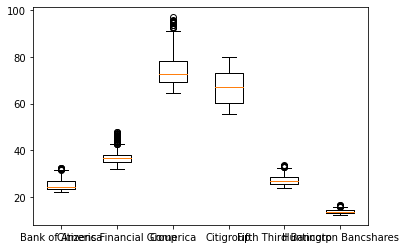

In [26]:
# boxplot:

fig1, ax1 = plt.subplots()

plt.boxplot(bank_price_list,labels=bankStock_list)

In [16]:
# convert 3 df into 3 csv files: 

pharm_df.to_csv("pharm.csv", index = False)

In [17]:
tech_df.to_csv("tech.csv", index = False)

In [18]:
banks_df.to_csv("bank.csv", index = False)

In [19]:
# manipulating and put into SQL database:

# connect to local database: 
connection = "postgres:Postgres@localhost:5432/stockPandas_db"
engine = create_engine(f'postgresql://{connection}')

# put df into sql database format:

#allstock_df.to_sql(name='stock_master', con=engine, if_exists='append', index=False)
banks_df.to_sql(name='stock_banks', con = engine,if_exists='append',index=False)
tech_df.to_sql(name='stock_tech', con = engine,if_exists='append',index=False)
pharm_df.to_sql(name='stock_pharm', con = engine,if_exists='append',index=False)